# Le dataset

Dans ce challenge on utilisera le dataset ci-après [dataset food](https://drive.google.com/open?id=1L4tDDnZWwPDjeRKlleoYHgic2_xNhZ8i).

Tu l'utiliseras pour mener une analyse descriptive et exploratoire. L'objectif est d'arriver à un dataset permettant de répondre à la question : "Est-ce que cet aliment est sain ou non ?"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

# Importation dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Formation DATA/yuka_1.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,code,url,last_modified_datetime,product_name,quantity,brands,categories,categories_tags,categories_fr,countries_fr,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_fr,main_category,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-17T09:18:13Z,Farine de blé noir,1kg,Ferme t'y R'nao,NaN,NaN,NaN,France,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-fr.openfoodfacts.org/produit/0000...,2015-06-17T10:11:54Z,Filet de bœuf,2.46 kg,NaN,Filet de bœuf,fr:filet-de-boeuf,Filet-de-boeuf,France,NaN,unknown,unknown,"A compléter,Informations nutritionnelles à com...",fr:filet-de-boeuf,Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000027205,http://world-fr.openfoodfacts.org/produit/0000...,2016-03-17T18:17:18Z,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-fr.openfoodfacts.org/produit/0000...,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,NaN,NaN,NaN,France,NaN,unknown,unknown,"A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000005200016,http://world-fr.openfoodfacts.org/produit/0000...,2015-09-18T10:05:52Z,lentilles vertes,1 kg,Bertrand Lejeune,"Aliments et boissons à base de végétaux,Alimen...","en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",France,NaN,Cereals and potatoes,Legumes,"A compléter,Informations nutritionnelles à com...",en:plant-based-foods-and-beverages,Aliments et boissons à base de végétaux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94392 entries, 0 to 94391
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code                     94392 non-null  object 
 1   url                      94392 non-null  object 
 2   last_modified_datetime   94392 non-null  object 
 3   product_name             87398 non-null  object 
 4   quantity                 67730 non-null  object 
 5   brands                   82530 non-null  object 
 6   categories               58752 non-null  object 
 7   categories_tags          58752 non-null  object 
 8   categories_fr            58752 non-null  object 
 9   countries_fr             94392 non-null  object 
 10  nutrition_grade_fr       58501 non-null  object 
 11  pnns_groups_1            61635 non-null  object 
 12  pnns_groups_2            63636 non-null  object 
 13  states_fr                94392 non-null  object 
 14  main_category         

# Exploration et nettoyage de pnns_groups_1



In [ ]:
#exploration de la colonne pnns_groups_1
print(df['pnns_groups_1'].unique())

#on constate qu'il y a des erreurs de frappes pour les groupes Cereals and potatoes, Fruits and vegetables, Sugary snacks
#on remplace des objet mal renseignes
df['pnns_groups_1'] = df['pnns_groups_1'].replace({'cereals-and-potatoes':'Cereals and potatoes','fruits-and-vegetables':'Fruits and vegetables', 'sugary-snacks':'Sugary snacks'})

#on verifie
print(df['pnns_groups_1'].unique())

[nan 'unknown' 'Cereals and potatoes' 'Sugary snacks' 'Beverages'
 'Fish Meat Eggs' 'Fruits and vegetables' 'Composite foods' 'Salty snacks'
 'Fat and sauces' 'Milk and dairy products' 'fruits-and-vegetables'
 'sugary-snacks' 'cereals-and-potatoes']
[nan 'unknown' 'Cereals and potatoes' 'Sugary snacks' 'Beverages'
 'Fish Meat Eggs' 'Fruits and vegetables' 'Composite foods' 'Salty snacks'
 'Fat and sauces' 'Milk and dairy products']


In [ ]:
#nombre de NaN dans pnns_groups_1
df['pnns_groups_1'].isna().sum()

32757

In [ ]:
#on remplace les NaN par 'unknown'
df['pnns_groups_1'].fillna('unknown', inplace = True)
df['pnns_groups_1'].isna().sum()

0

# Exploration et nettoyage de pnns_groups_2

In [ ]:
#exploration de la colonne pnns_groups_2
df['pnns_groups_2'].unique()

#pnns_groups_2 sont donc les sous groupes de pnns_groups_1

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat', 'Soups',
       'Alcoholic beverages', 'Sandwich', 'Appetizers',
       'Dressings and sauces', 'Chocolate products', 'Dried fruits',
       'Nuts', 'One-dish meals', 'Cheese', 'Fruits', 'Fats',
       'Pizza pies and quiche', 'Vegetables', 'Breakfast cereals',
       'Cereals', 'Fruit juices', 'vegetables', 'Ice cream',
       'Milk and yogurt', 'Bread', 'Fish and seafood', 'Tripe dishes',
       'pastries', 'Processed meat', 'Dairy desserts',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [ ]:
#on constate qu'il y a des erreurs de frappes/langues pour les groupes Vegetables, Sugary snacks
#on remplace des objet mal renseignes
df['pnns_groups_2'] = df['pnns_groups_2'].replace({'legumes':'Vegetables','Legumes':'Vegetables','vegetables':'Vegetables', 'cereals':'Cereals','fruits':'Fruits'})

#on verifie
print(df['pnns_groups_2'].unique())

[nan 'unknown' 'Vegetables' 'Biscuits and cakes' 'Sweets'
 'Non-sugared beverages' 'Sweetened beverages' 'Meat' 'Soups'
 'Alcoholic beverages' 'Sandwich' 'Appetizers' 'Dressings and sauces'
 'Chocolate products' 'Dried fruits' 'Nuts' 'One-dish meals' 'Cheese'
 'Fruits' 'Fats' 'Pizza pies and quiche' 'Breakfast cereals' 'Cereals'
 'Fruit juices' 'Ice cream' 'Milk and yogurt' 'Bread' 'Fish and seafood'
 'Tripe dishes' 'pastries' 'Processed meat' 'Dairy desserts'
 'Artificially sweetened beverages' 'Fruit nectars' 'Potatoes' 'Eggs'
 'Salty and fatty products']


In [ ]:
#nombre de NaN dans pnns_groups_2
df['pnns_groups_2'].isna().sum()

30756

In [ ]:
#on remplace les NaN par 'unknown'
df['pnns_groups_2'].fillna('unknown', inplace = True)
df['pnns_groups_2'].isna().sum()

0

In [ ]:
#Correspondances entre groupes et sous groupes

for groupe in df['pnns_groups_1'].unique():
  print('Les sous-groupes du groupe {} sont {}'.format(groupe,df[df['pnns_groups_1'] == groupe]['pnns_groups_2'].unique()))

#on constate que Vegetables apparait a la fois dans Cereals and potatoes et Fruits and vegetables
#On change le groupe des produits qui sont dans le sous groupe Vegetables pour le remplacer par Vegetables
for i in df.index:
  if df.iloc[i,12] == 'Vegetables':
    df.iloc[i,11]= 'Fruits and vegetables'

#on verifie
for groupe in df['pnns_groups_1'].unique():
  print('Les sous-groupes du groupe {} sont {}'.format(groupe,df[df['pnns_groups_1'] == groupe]['pnns_groups_2'].unique()))

Les sous-groupes du groupe unknown sont ['unknown' 'Alcoholic beverages' 'Tripe dishes']
Les sous-groupes du groupe Cereals and potatoes sont ['Vegetables' 'Breakfast cereals' 'Cereals' 'Bread' 'Potatoes']
Les sous-groupes du groupe Sugary snacks sont ['Biscuits and cakes' 'Sweets' 'Chocolate products' 'pastries']
Les sous-groupes du groupe Beverages sont ['Non-sugared beverages' 'Sweetened beverages' 'Fruit juices'
 'Artificially sweetened beverages' 'Fruit nectars']
Les sous-groupes du groupe Fish Meat Eggs sont ['Meat' 'Fish and seafood' 'Processed meat' 'Eggs']
Les sous-groupes du groupe Fruits and vegetables sont ['Soups' 'Dried fruits' 'Fruits' 'Vegetables']
Les sous-groupes du groupe Composite foods sont ['Sandwich' 'One-dish meals' 'Pizza pies and quiche']
Les sous-groupes du groupe Salty snacks sont ['Appetizers' 'Nuts' 'Salty and fatty products']
Les sous-groupes du groupe Fat and sauces sont ['Dressings and sauces' 'Fats']
Les sous-groupes du groupe Milk and dairy products s

# Exploration et nettoyage de nutrition-score-fr_100g



In [ ]:
#exploration de la colonne nutrition-score-fr_100g
df['nutrition-score-fr_100g'].unique()

array([ nan,  14.,  13.,  15.,  12.,  22.,   6.,   1.,  11.,  19.,  18.,
         4.,   2.,  -3.,   5.,  16.,  24.,  21.,  20.,   8.,  23.,   3.,
        -2.,  -1.,  -5.,   9.,  10.,  -4.,  -6.,   0.,  29.,  35.,  27.,
        26.,  25.,  28.,   7.,  17.,  -9.,  36.,  32., -10.,  -8.,  30.,
        -7.,  33.,  40., -11.,  31., -12.,  34., -13., -14., -15.])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



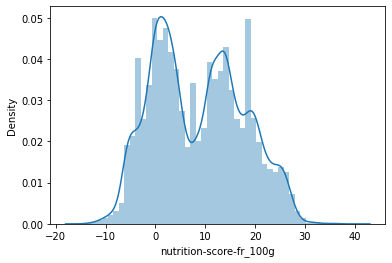

In [ ]:
#on regarde la distribution du nutriscore fr
sns.distplot(df['nutrition-score-fr_100g'])

In [ ]:
#On fait un describe pour avoir une meilleure representation des donnees
df['nutrition-score-fr_100g'].describe()

count    58501.000000
mean         8.601477
std          9.017877
min        -15.000000
25%          1.000000
50%          8.000000
75%         15.000000
max         40.000000
Name: nutrition-score-fr_100g, dtype: float64

In [ ]:
#nombre de NaN dans nutrition-score-fr_100g
df['nutrition-score-fr_100g'].isna().sum()

35891

In [ ]:
#On va donc remplir les NaN avec la mediane
df['nutrition-score-fr_100g'].fillna(df['nutrition-score-fr_100g'].median(), inplace = True)
df['nutrition-score-fr_100g'].isna().sum()

0

# Exploration et nettoyage de nutrition-score-uk_100g


In [ ]:
#exploration de la colonne nutrition-score-uk_100g
df['nutrition-score-uk_100g'].unique()

array([ nan,  14.,   2.,  15.,  12.,  13.,  22.,   6.,   1.,  11.,  19.,
        18.,   4.,  -3.,   5.,  16.,  24.,  21.,  20.,   8.,  23.,   3.,
        -2.,  -1.,  -5.,   9.,  10.,  -4.,  -6.,   0.,  29.,  35.,  27.,
        26.,  25.,  28.,   7.,  17.,  -9.,  36.,  32., -10.,  -8.,  -7.,
        31., -11., -12.,  34.,  30., -13.,  33., -14., -15.])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



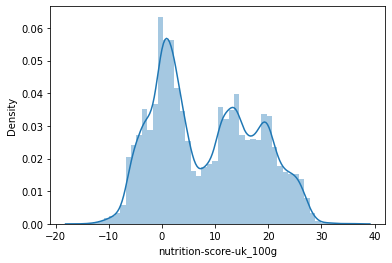

In [ ]:
#on regarde la distribution du nutriscore fr
sns.distplot(df['nutrition-score-uk_100g'])

In [ ]:
df['nutrition-score-uk_100g'].describe()

count    58501.000000
mean         8.292337
std          9.353005
min        -15.000000
25%          0.000000
50%          7.000000
75%         16.000000
max         36.000000
Name: nutrition-score-uk_100g, dtype: float64

In [ ]:
#nombre de NaN dans nutrition-score-uk_100g
df['nutrition-score-uk_100g'].isna().sum()

35891

In [ ]:
#On va donc remplir les NaN avec la mediane
df['nutrition-score-uk_100g'].fillna(df['nutrition-score-uk_100g'].median(), inplace = True)
df['nutrition-score-uk_100g'].isna().sum()

0

# Solution 1 (avec nutrition scores et sous-groupes)

## Visualisation des nutrition scores fr et uk pour chaque groupe

In [ ]:
#Calcul des moyennes du score nutrition fr et du score nutrition uk pour chaque groupe
#on les met dans une liste afin de pouvoir les exploiter sous forme de graphique 

#initialisation des listes
list_groupe =[]
list_score_uk = []
list_score_fr = []

for groupe in df['pnns_groups_1'].unique():
  #possibilite d'afficher le score FR et UK pour chaque groupe
  #print('{} : {}'.format(groupe,round(df[df['pnns_groups_1'] == groupe]['nutrition-score-fr_100g'].mean(),0)))
  #print('{} : {}'.format(groupe,round(df[df['pnns_groups_1'] == groupe]['nutrition-score-uk_100g'].mean(),0)))
  #liste contenant les groupes
  list_groupe.append(groupe)
  #listes pour les moyennes des scores nutrition uk et fr
  list_score_uk.append(round(df[df['pnns_groups_1'] == groupe]['nutrition-score-uk_100g'].mean(),0))
  list_score_fr.append(round(df[df['pnns_groups_1'] == groupe]['nutrition-score-fr_100g'].mean(),0))

#on recupere trois listes qui contiennent les groupes et les scores FR et UK dans le meme ordre
print(list_groupe)
print(list_score_uk)
print(list_score_fr)

['unknown', 'Fruits and vegetables', 'Sugary snacks', 'Beverages', 'Fish Meat Eggs', 'Composite foods', 'Salty snacks', 'Fat and sauces', 'Milk and dairy products', 'Cereals and potatoes']
[8.0, 0.0, 15.0, 3.0, 9.0, 4.0, 12.0, 12.0, 10.0, 2.0]
[9.0, 0.0, 15.0, 8.0, 9.0, 4.0, 12.0, 11.0, 8.0, 3.0]


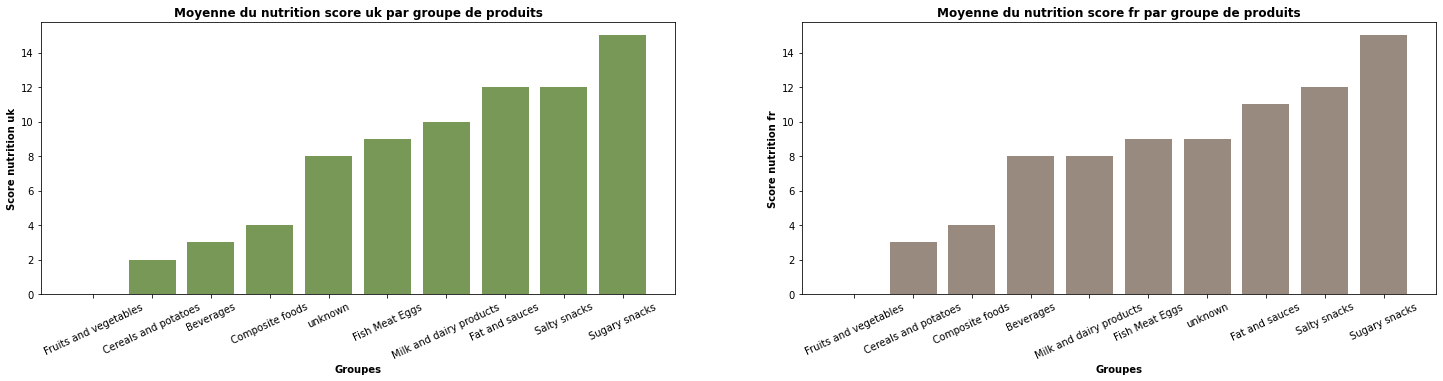

In [ ]:
#barplots des moyennes des nutriscores uk et fr par groupe de produits, du plus petit au plus grand nutriscore

#tri selon liste uk
unsorted_list = [(list_score_uk, list_groupe) for list_groupe, list_score_uk in zip(list_groupe, list_score_uk)]
sorted_list = sorted(unsorted_list)
bars_sorted = []
height_sorted = []

for i in sorted_list:
    bars_sorted += [i[1]]
    height_sorted += [i[0]]

#tri selon liste fr
unsorted_list_1 = [(list_score_fr, list_groupe) for list_groupe, list_score_fr in zip(list_groupe, list_score_fr)]
sorted_list_1 = sorted(unsorted_list_1)
bars_sorted_1 = []
height_sorted_1 = []

for i in sorted_list_1:
    bars_sorted_1 += [i[1]]
    height_sorted_1 += [i[0]]


#figures
fig,ax = plt.subplots(figsize = (25,5))

#uk
ax1 = plt.subplot(121)
ax1.bar(range(len(height_sorted)),height_sorted, color = '#557f2d',alpha = 0.80)

# legendes, titres
plt.ylabel('Score nutrition uk', fontweight='bold')
plt.xticks(range(len(height_sorted)), bars_sorted,rotation=25)
plt.xlabel("Groupes", fontweight='bold')
plt.title("Moyenne du nutrition score uk par groupe de produits", fontweight='bold')

#fr
ax2 = plt.subplot(122)
ax2.bar(range(len(height_sorted_1)),height_sorted_1, color = '#7f6d5f',alpha = 0.80)

# legendes, titres
plt.ylabel('Score nutrition fr', fontweight='bold')
plt.xticks(range(len(height_sorted_1)), bars_sorted_1,rotation=25)
plt.xlabel("Groupes", fontweight='bold')
plt.title("Moyenne du nutrition score fr par groupe de produits", fontweight='bold')

plt.show()

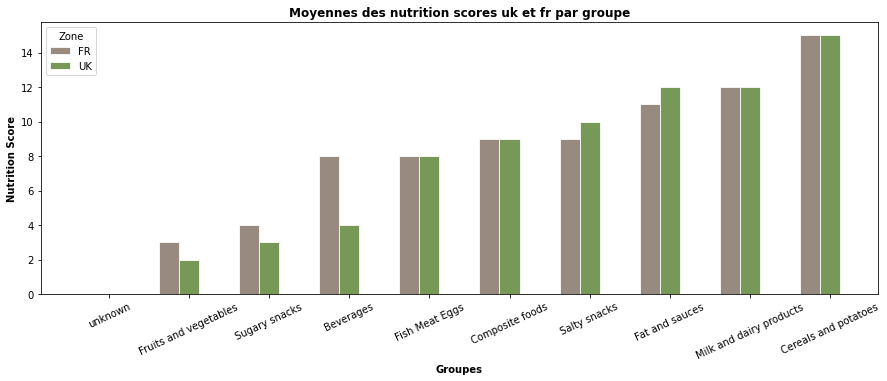

In [ ]:
#figure montrant les nutriscores uk et fr cote a cote pour pouvoir mieux comparer
fig,ax = plt.subplots(figsize = (15,5))

bars1 = height_sorted_1
bars2 = height_sorted

barWidth = 0.25

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='FR',alpha = 0.80)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='UK',alpha = 0.80)

#legendes, titres
plt.xlabel('Groupes', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], list_groupe, rotation = 25)
plt.ylabel("Nutrition Score", fontweight='bold')
plt.legend(title = 'Zone')
plt.title('Moyennes des nutrition scores uk et fr par groupe', fontweight='bold')

plt.show()


#Grace a ce graphique, on constate que le nutrition score FR n'est dans certains cas pas le meme que le nutrition score UK pour le meme groupe de produits.
#Sachant que plus le nutrition score est eleve, moins l'aliment est sain, on peut par exemple en deduire que le UK est plus indulgent sur le nutrition score des boissons que la France.

#Pour savoir si un aliment est sain ou non, on se basera donc par la suite sur la moyenne entre nutrition score FR et nutrition score UK.

## Visualisation du nutrition score (moyenne entre FR UK) par sous-groupe


In [ ]:
#comme on l'a vu plus haut, les nutriscores FR et UK sont proches mais ils ne sont pas identiques
#on fait donc une moyenne entre les deux pour chaque produit
#on cree une colonne nutriscore dans le df
df['nutriscore'] = (df['nutrition-score-fr_100g'] + df['nutrition-score-uk_100g']) / 2

#sur le meme principe que predemment, on calcule pour chaque sous groupe la moyenne des nutriscores des produits appartenant a ce sous-groupe et on la place dans une liste
list_mean =[]
list_ss_groupe =[]
#list_groupe_bis = []

for sous_groupe in df['pnns_groups_2'].unique():
  list_mean.append(df[df['pnns_groups_2'] == sous_groupe]['nutriscore'].mean())
  list_ss_groupe.append(sous_groupe)

  #on aurait pu egalement creer une liste qui matche groupe et sous-groupes
  #groupe = df[df['pnns_groups_2'] == sous_groupe]['pnns_groups_1'].unique()
  #list_groupe_bis.append(groupe)

#il y a donc autant de moyennes calculees que de sous-groupes
print(len(list_mean))
print(len(list_ss_groupe))
print(list_mean)
print(list_ss_groupe)

36
36
[8.32968720690302, -0.7717587576742506, 16.81832342112716, 11.51601368159204, 6.039688427299703, 8.303835800807537, 6.2774049217002235, 2.186893203883495, 7.440340909090909, 7.924409448818897, 12.55134074558535, 9.919828641370868, 18.791476407914764, 3.850828729281768, 11.207877461706783, 3.2384711258828416, 12.905151409676296, 1.0135961930659416, 15.129452649869679, 8.784222737819025, 6.685817805383023, 0.5678670360110804, 1.4854827819041188, 11.455963302752293, 3.687468030690537, 3.8333333333333335, 6.030664794007491, 7.7384615384615385, 13.824503311258278, 12.770767613038906, 6.372739916550765, 2.9086021505376345, 7.2130872483221475, 4.01980198019802, 4.929467084639499, 14.428571428571429]
['unknown', 'Vegetables', 'Biscuits and cakes', 'Sweets', 'Non-sugared beverages', 'Sweetened beverages', 'Meat', 'Soups', 'Alcoholic beverages', 'Sandwich', 'Appetizers', 'Dressings and sauces', 'Chocolate products', 'Dried fruits', 'Nuts', 'One-dish meals', 'Cheese', 'Fruits', 'Fats', 'Piz

In [ ]:
#on classe les listes nutriscores et sous groupes dans l'ordre croissant selon les nutriscores
unsorted_list = [(list_mean, list_ss_groupe) for list_ss_groupe, list_mean in zip(list_ss_groupe, list_mean)]
sorted_list = sorted(unsorted_list)

list_ss_groupe_sorted = []
list_mean_sorted = []

for i in sorted_list:
    list_ss_groupe_sorted += [i[1]]
    list_mean_sorted += [i[0]]

In [ ]:
#figure representant la moyenne du nutriscore par sous-groupe de produits dans l'ordre croissant
px.scatter(data_frame = df, 
                 x= list_ss_groupe_sorted, 
                 y=list_mean_sorted,
           title="Nutriscore moyen par sous-groupe",
                 labels={
                     'x': "Sous-groupes",
                     'y': "Nutriscore",
                     'animation_frame':'Groupe',
                     'color':'Nutriscore'},
           range_y = [-5,25],
           color =list_mean_sorted, color_continuous_scale=px.colors.diverging.Fall)

#ce graphique nous aide a determiner si le produit est sain en fonction du sous-groupe auquel il appartient et de son nutriscore
#nous pourrions faire la meme chose pour le groupe auquel appartient le produit mais le resultat serait moins precis
#on voit par exemple que les legumes ont generalement un nutriscore de produit 'sain' alors que les chocolats ont un mauvais nutriscore 

## Le produit est-il sain ou non ?

In [ ]:
#On peut creer une fonction afin de determiner si le produit est sain ou non en fonction du sous-groupe auquel il appartient
#On choisit un nutriscore arbitraire qui est la limite entre un produit sain et un produit non sain : nutriscore = 4.


#on cree une liste contenant les sous-groupe sain et une liste sontenant les sous groupes non sain
list_healthy = []
list_non_healthy = []

for i in range(len(list_mean)):
  if list_mean[i] < 4 :
    list_healthy.append(list_ss_groupe[i])
  else:
    list_non_healthy.append(list_ss_groupe[i])

#on definit la fonction qui prend comme argument le nom du produit
def healthy(produit):
  sous_groupe_pdt = list(df.loc[df['product_name'] == produit, 'pnns_groups_2'])
  for i in range(len(sous_groupe_pdt)):
    if sous_groupe_pdt[i] == 'unknown':
      sous_groupe_pdt[i] = ''
    if sous_groupe_pdt[i] in list_healthy:
      print('Le produit est sain, resservez-vous !')
    elif sous_groupe_pdt[i] in list_non_healthy:
      print('Halte-la ! Vos arteres vont en prendre un coup !')


healthy('Farine de blé noir')

Le produit est sain, resservez-vous !


In [ ]:
#Une solution plus simple serait de faire une fonction qui determine si le produit est sain en fonction de son nutriscore moyen (FR+UK)

def healthy_2(produit):
  #sachant que les NaN de nutriscore ont ete remplace par 7.5 (car on a cree la colonne a partir des nutriscores FR et UK),
  #on enleve cette valeur de la liste correspondant aux nutriscores du produit et on affiche 'nutriscore inconnu' si le nutriscore du produit est egal a 7.5 (le nutriscore est un entier)
  nutriscore = list(df.loc[df['product_name'] == produit, 'nutriscore'])
  if nutriscore[0] == 7.5 and len(nutriscore) == 1:
    print('Nutriscore inconnu')
  else:
    for i in range (len(nutriscore)):
      if nutriscore[i] == 7.5:
        nutriscore[i] = 0
    nutriscore_pdt = sum(nutriscore)
    if nutriscore_pdt < 4:
      print('Le produit est sain, resservez-vous !')
    else:
      print('Halte-la ! Vos arteres vont en prendre un coup !')

print('Filet de bœuf : ')
healthy_2('Filet de bœuf')

print('Farine de blé noir : ')
healthy_2('Farine de blé noir')

Filet de bœuf : 
Nutriscore inconnu
Farine de blé noir : 
Le produit est sain, resservez-vous !


# Solution 2 (avec les colonnes taux pour 100g)



## Exploration et nettoyage de energy_100g jusqu'a sodium_100g

### energy_100g

In [ ]:
df['energy_100g'].isna().sum()

32958

In [ ]:
df['energy_100g'].describe()

count    6.143400e+04
mean     1.168106e+03
std      1.316053e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.028000e+03
75%      1.640000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

In [ ]:
#On remplit les NaN de energy_100g avec la moyenne
df['energy_100g'].fillna(df['energy_100g'].mean(), inplace = True)
df['energy_100g'].isna().sum()

0

### saturated-fat_100g

In [ ]:
df['saturated-fat_100g'].isna().sum()

35002

In [ ]:
df['saturated-fat_100g'].describe()

count    59390.000000
mean         5.386003
std          8.538552
min          0.000000
25%          0.300000
50%          1.900000
75%          7.300000
max        210.000000
Name: saturated-fat_100g, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



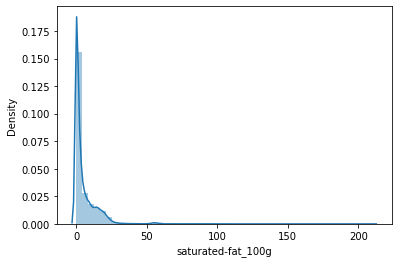

In [ ]:
#on regarde la distribution de saturated-fat_100g
sns.distplot(df['saturated-fat_100g'])

In [ ]:
#On remplit les NaN avec la mediane
df['saturated-fat_100g'].fillna(df['saturated-fat_100g'].median(), inplace = True)
df['saturated-fat_100g'].isna().sum()

0

### sugars_100g

In [ ]:
df['sugars_100g'].isna().sum()

34904

In [ ]:
df['sugars_100g'].describe()

count    59488.000000
mean        13.235246
std         19.028753
min         -0.100000
25%          1.000000
50%          4.000000
75%         17.000000
max        105.000000
Name: sugars_100g, dtype: float64

In [ ]:
#On remplit les NaN avec la moyenne
df['sugars_100g'].fillna(df['sugars_100g'].mean(), inplace = True)
df['sugars_100g'].isna().sum()

0

### proteins_100g

In [ ]:
df['proteins_100g'].isna().sum()

33208

In [ ]:
df['proteins_100g'].describe()

count    61184.000000
mean         7.794483
std          7.930606
min          0.000000
25%          1.800000
50%          6.000000
75%         11.000000
max        100.000000
Name: proteins_100g, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



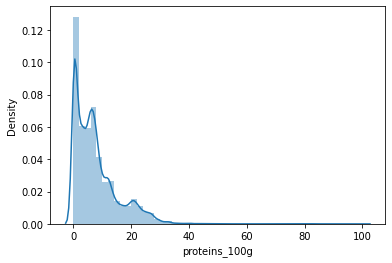

In [ ]:
#on regarde la distribution
sns.distplot(df['proteins_100g'])

In [ ]:
#On remplit les NaN avec la mean
df['proteins_100g'].fillna(df['proteins_100g'].mean(), inplace = True)
df['proteins_100g'].isna().sum()

0

### salt_100g

In [ ]:
df['salt_100g'].isna().sum()

34848

In [ ]:
df['salt_100g'].describe()

count    59544.000000
mean         1.161267
std          4.291300
min          0.000000
25%          0.080000
50%          0.570000
75%          1.250000
max        211.000000
Name: salt_100g, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



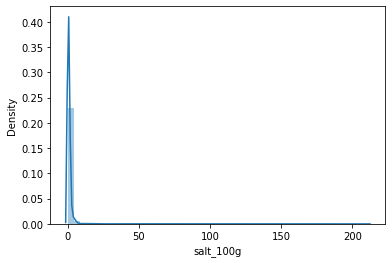

In [ ]:
sns.distplot(df['salt_100g'])

In [ ]:
#On remplit les NaN avec la mediane
df['salt_100g'].fillna(df['salt_100g'].median(), inplace = True)
df['salt_100g'].isna().sum()

0

### sodium_100g

In [ ]:
df['sodium_100g'].isna().sum()

34851

In [ ]:
df['sodium_100g'].describe()

count    59541.000000
mean         0.457213
std          1.689468
min          0.000000
25%          0.031496
50%          0.224409
75%          0.492126
max         83.000000
Name: sodium_100g, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



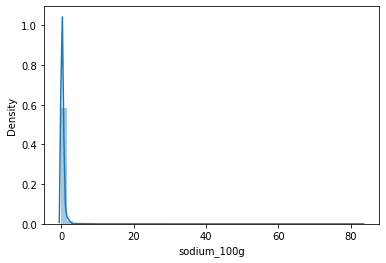

In [ ]:
sns.distplot(df['sodium_100g'])

In [ ]:
#On remplit les NaN avec la mediane
df['sodium_100g'].fillna(df['sodium_100g'].median(), inplace = True)
df['sodium_100g'].isna().sum()

0

## Correlation des colonnes numeriques avec le nutrition score moyen

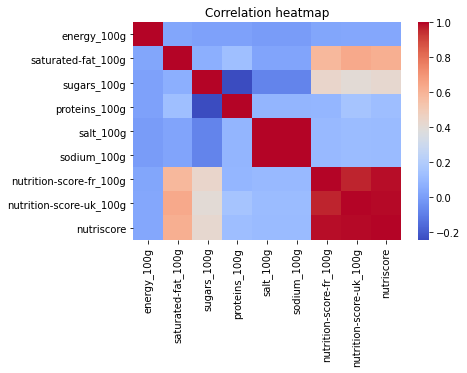

In [ ]:
#on cree une heatmap pour voir les correlations entre les colonnes
#la heatmap prend en compte seulement les variables numeriques
# on voit que la colonne saturated-fat_100g est tres correlee avec les nutrition scores (et nutriscore qui est la moyenne de nutrition score fr et nutrition score uk)
#la colonne sugars_100g est aussi relativement correlee avec les nutrition scores

sns.heatmap(df.corr(), 
            cmap = "coolwarm")

plt.title('Correlation heatmap')

plt.show()

In [ ]:
#on regarde les coefficients de correlation
#saturated-fat_100g est bien hautement correlee avec nutriscore
#Plus un aliment a un taux de gras sature eleve, plus son nutrition score est eleve (fr ou uk)

df.corr(method='pearson',min_periods=1)['nutriscore'].sort_values(ascending = False)


nutriscore                 1.000000
nutrition-score-uk_100g    0.990840
nutrition-score-fr_100g    0.990088
saturated-fat_100g         0.617602
sugars_100g                0.425893
proteins_100g              0.128964
sodium_100g                0.115924
salt_100g                  0.115920
energy_100g                0.034485
Name: nutriscore, dtype: float64

## Visualisation des nutriscores en fonction de saturated-fat_100g et sugars_100g par groupe

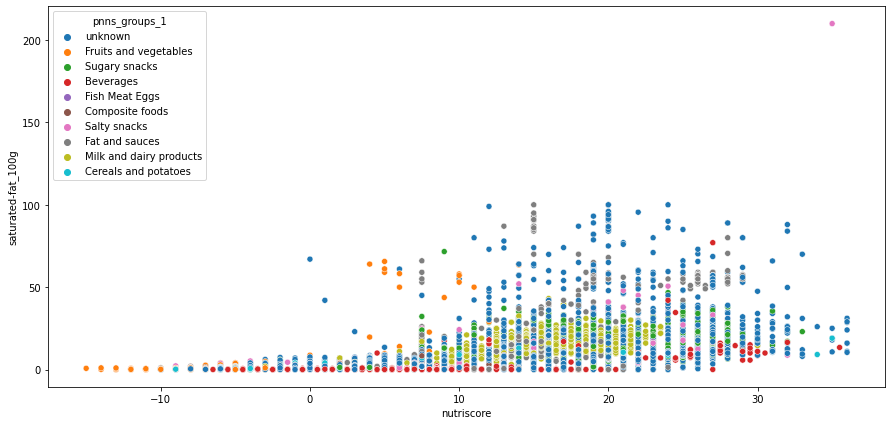

In [ ]:
#saturated-fat_100g
ax, fig = plt.subplots(figsize = (15,7))
sns.scatterplot(x = 'nutriscore', y = 'saturated-fat_100g', data = df, hue = 'pnns_groups_1' )

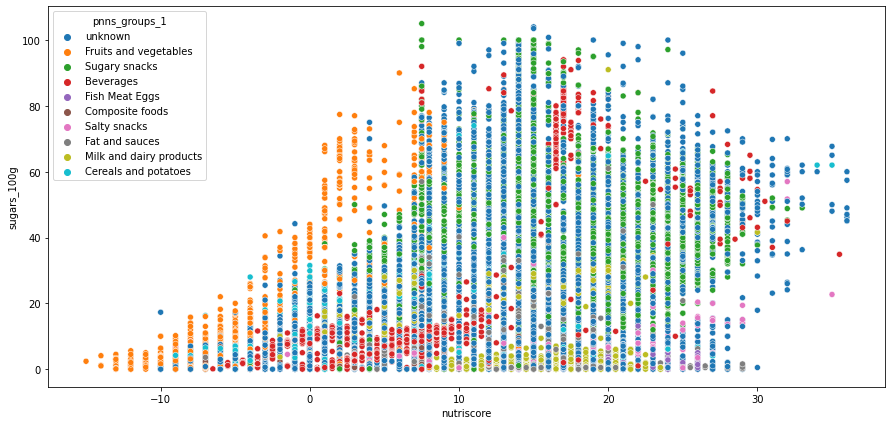

In [ ]:
#sugars_100g
ax, fig = plt.subplots(figsize = (15,7))
sns.scatterplot(x = 'nutriscore', y = 'sugars_100g', data = df, hue = 'pnns_groups_1' )

In [ ]:
#On voit bien que les groupes qui ont les taux de gras satures et de sucre les moins eleve et donc un meilleur nutriscore sont les groupes 'Fruits and Vegetables'
#et 'Cereals and potatoes', et aussi certaines 'Beverages'.

## Prediction du nutrition score a l'aide des taux pour 100g

In [ ]:
# Pour predire le nutrition score d'un aliment a l'aide des taux,
#on fait une regression lineaire multiple avec comme variables X les taux pour 100g, et en y le nutrition score moyen (moyenne de uk et fr) de la colonne 'nutriscore'

#importation des librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#definition de X et y
X = df[['energy_100g','saturated-fat_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']]
y = df['nutriscore']

#split du dataset initial
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)


#train le modele avec la partie train du dataset
newmodel = LinearRegression().fit(X_train, y_train)


#Valeurs de R2
print("\nScore for the Train dataset :", newmodel.score(X_train, y_train))
print("Score for the Test dataset :", newmodel.score(X_test, y_test))

#les r2 sont proches donc il n'y a pas d'overfitting et le modele semble ok


Score for the Train dataset : 0.5652755480757772
Score for the Test dataset : 0.5708215555623561


In [ ]:
#on predit le nutrition score d'un produit a l'aide des taux pour 100g
#on peut prendre la moyenne de chacun des taux comme exemple

mean_rates = [[df['energy_100g'].mean(),df['saturated-fat_100g'].mean(),df['sugars_100g'].mean(),df['proteins_100g'].mean(),df['salt_100g'].mean(),
              df['sodium_100g'].mean()]]

nutrition_score_predicted = newmodel.predict(mean_rates)


print('Mon produit a les taux suivants :')
print('energy_100g : {}, saturated-fat_100g: {}, sugars_100g: {} , proteins_100g : {}, salt_100g : {}, sodium_100g : {}'. format(df['energy_100g'].mean(),
      df['saturated-fat_100g'].mean(),df['sugars_100g'].mean(),df['proteins_100g'].mean(),df['salt_100g'].mean(), df['sodium_100g'].mean()))
print('Son nutrition score est donc de {}'.format(nutrition_score_predicted[0]))

#on precise si le produit est sain en fonction de son nutrition score (valeur arbitraire de 4)
if nutrition_score_predicted[0] < 4:
  print('Mon produit est sain !')
else:
  print("Mon produit n'est pas sain !")


Mon produit a les taux suivants :
energy_100g : 1168.1057313537267, saturated-fat_100g: 4.093339654104242, sugars_100g: 13.235245576922134 , proteins_100g : 7.794483141022764, salt_100g : 0.9429806239987341, sodium_100g : 0.3712581395979224
Son nutrition score est donc de 8.082820244704326
Mon produit n'est pas sain !
